<a href="https://colab.research.google.com/github/mathmeza/data_science/blob/main/An%C3%A1lise_dos_Dados_do_Airbnb_Fl%C3%B3rida_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb: *Flórida - USA*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade da Flórida, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) obteremos os dados, tendo em vista que possui indicadores da plataforma Airbnb justamente para nos ajudar nas análises.

Para a análise exploratória inicial, utilizaremos apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Flórida (good for visualizations).*

In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/fl/broward-county/2020-12-29/visualisations/listings.csv')

## Análise dos Dados

Essa etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - Número de id gerado para identificar o imóvel
* `name` - Nome da propriedade anunciada 
* `host_id` - Número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Esta coluna não contém nenhum valor válido
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Informa o tipo de quarto que é oferecido
* `price` - Preço para alugar o imóvel
* `minimum_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews` - Número de reviews que a propriedade possui
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,57818,Private house close to the beach!,275948,VonJon,NaN,Hollywood,26.01670,-80.12437,Entire home/apt,125,2,41,2020-03-09,0.42,1,300
1,69824,2 bd/2ba Oceanfront Condo,351303,Tracy,NaN,Hallandale Beach,25.97840,-80.12028,Entire home/apt,140,30,7,2020-03-01,0.19,2,2
2,83449,MARY POP APTS 2/1 APT SLEEP 5,454736,"Jon, Mary Pop Apartments",NaN,Dania Beach,26.03392,-80.14201,Entire home/apt,100,7,20,2020-01-26,0.18,8,349
3,86410,GREAT STUDIO FEW BLOCKS TO THE BEACH,474053,Estela And Adriana,NaN,Hallandale Beach,25.98672,-80.12629,Entire home/apt,69,3,55,2019-01-30,0.47,1,363
4,105411,House in the Ranches,532930,Sonia,NaN,Southwest Ranches,26.04678,-80.36809,Entire home/apt,235,4,5,2018-03-28,0.05,1,358


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Agora vamos entender qual a representatividade de nossa base de dados e verificar o tipo de dado de cada coluna.

Reforçando que este *dataset* é a versão "resumida" das opções do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) na qual esta versão baixada denomina-se como `listings.csv`. Há também outra versão com mais entradas e variáveis de dados chamada `listings.csv.gz`.  

In [5]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}'.format(df.shape[1]))

# verificar o tipo de dado de cada variável
display(df.dtypes)

Entradas:	 10930
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É de suma importância entendermos se há valores ausentes no nosso `dataset`, tendo em vista que se não verificarmos essa informação de início pode nos causar problemas futuramente impactando em nossa análise exploratória. 

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 26%.
* A variável `host_name` têm aproximadamente 0,03% dos valores nulos.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.260018
last_review                       0.260018
host_name                         0.000366
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, será plotado um histograma.



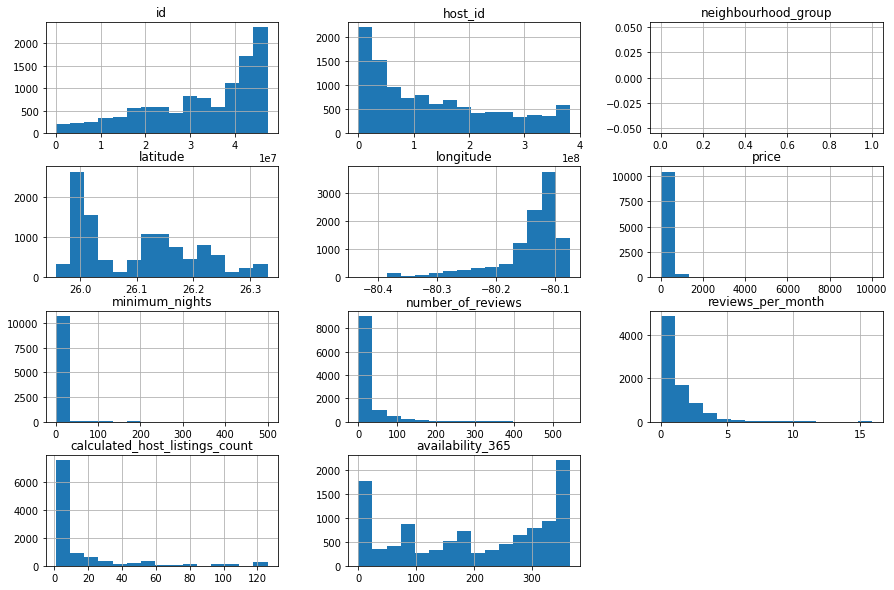

In [7]:
# plotar o histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes no *dataset*?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Veja por exemplo as variaváveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Obs: Lembrando que *outliers* são valores que estão fora da distribuição normal de uma base de dados, ou seja, em sua maioria valores fora da curva.

**Para confirmar a presença dos *outliers*, existem duas maneiras rápidas, sendo elas:**
* Resumo estatístico por meio do método `describe()`.
* Plotar `boxplots` para cada variável.

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,10930.000000,10930.000000,10930.000000,8088.000000,10930.000000,10930.000000
mean,231.799360,6.762031,20.922598,1.257614,15.118939,199.644922
std,379.888126,20.059528,41.099036,1.385519,26.532821,131.788705
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,87.000000,1.000000,0.000000,0.300000,1.000000,82.000000
50%,145.000000,2.000000,5.000000,0.820000,4.000000,214.000000
75%,250.000000,4.000000,23.000000,1.792500,14.000000,331.000000
max,10000.000000,500.000000,544.000000,15.920000,126.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 250, porém seu valor máximo é 10000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights


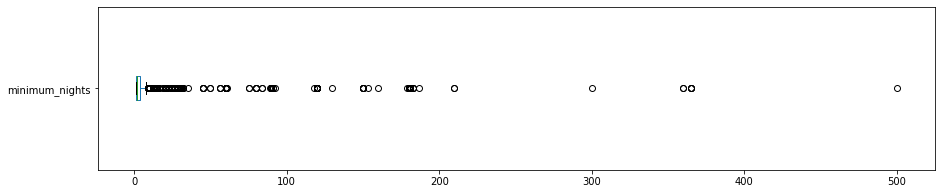

minimum_nights: valores acima de 30:
240 entradas
2.1958%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box',vert=False, figsize=(15,3))
plt.show()

# ver a quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) /df.shape[0])*100))

#### Boxplot para price 

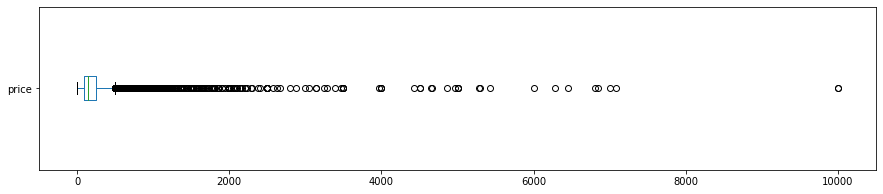

price: valores acima de 800:
350 entradas
3.2022%


In [10]:
# price
df.price.plot(kind='box',vert=False, figsize=(15,3))
plt.show()

# ver a quantidade de valores acima de 800 para price
print("price: valores acima de 800:")
print("{} entradas".format(len(df[df.price > 800])))
print("{:.4f}%".format((len(df[df.price > 800]) /df.shape[0])*100))

#### Boxplot para calculated_host_listings_count 

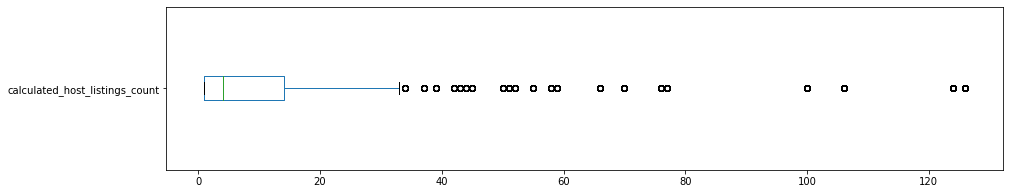

calculated_host_listings_count: valores acima de 50:
1122 entradas
10.2653%


In [11]:
# calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver a quantidade de valores acima de 50 para calculated_host_listings_count
print("calculated_host_listings_count: valores acima de 50:")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 50])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 50]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `minimum_nights`, `price` e `calculated_host_listings_count` vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

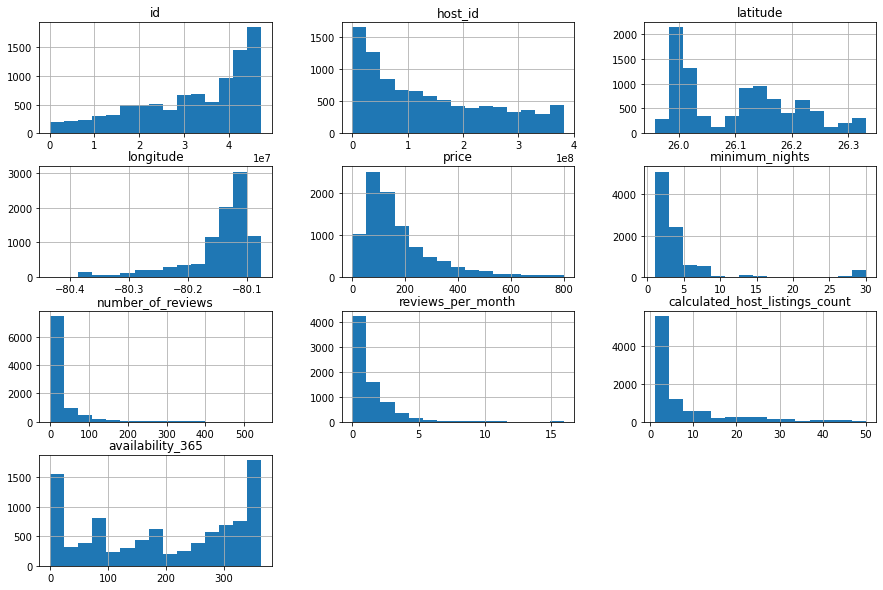

In [16]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 800].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 50].index, axis=0, inplace=True)


# remover `neighbourhood_group`, pois está vazio.
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média de preço do aluguel?**

Considerando a exclusão dos maiores outliers da base, verificamos que a média de preço na Florida é de `$ 177.00`.

In [34]:
# ver a média da coluna `price``
print("Média de preço: {}".format(round(df_clean.price.mean()),2))

Média de preço: 177


### **Q6. Qual a correlação existente entre as variáveis**

`Correlação` significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [38]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.008454,-0.100663,-0.093848,0.079239,0.084021
minimum_nights,0.008454,1.000000,-0.119494,-0.210031,-0.100621,0.015865
number_of_reviews,-0.100663,-0.119494,1.000000,0.668575,-0.070755,0.019336
reviews_per_month,-0.093848,-0.210031,0.668575,1.000000,-0.025208,-0.045437
calculated_host_listings_count,0.079239,-0.100621,-0.070755,-0.025208,1.000000,0.011712
availability_365,0.084021,0.015865,0.019336,-0.045437,0.011712,1.000000


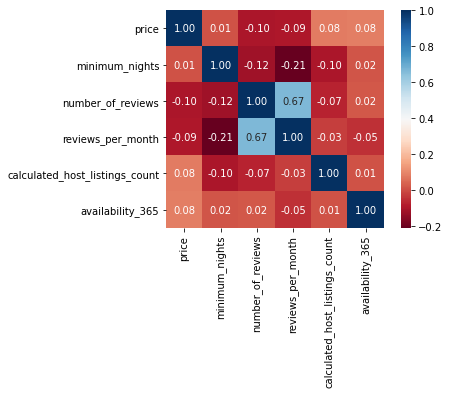

In [40]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [41]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    7030
Private room       2062
Shared room         117
Hotel room           91
Name: room_type, dtype: int64

In [42]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.755914
Private room       0.221720
Shared room        0.012581
Hotel room         0.009785
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [43]:
# ver média de preços por bairro de modo geral
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lighthouse Point            334.258065
Hillsboro Beach             252.333333
Lazy Lake                   238.333333
County Regional Facility    216.400000
Tribal Land                 215.666667
Unincorporated              211.787879
Hallandale Beach            209.117061
Wilton Manors               198.913043
Southwest Ranches           195.533333
Fort Lauderdale             193.168112
Name: price, dtype: float64

In [64]:
# ver média de preços por bairros que possuem maior representatividade na base
df_cidades_com_maior_representatividade = df_clean.groupby(['neighbourhood']).price.count().sort_values(ascending=False)[:10]
df_cidades_com_maior_representatividade = df_cidades_com_maior_representatividade.to_frame().reset_index()
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[df_cidades_com_maior_representatividade['neighbourhood']]

neighbourhood
Hollywood                181.788781
Fort Lauderdale          193.168112
Pompano Beach            184.589537
Hallandale Beach         209.117061
Deerfield Beach          175.797927
Lauderdale By The Sea    183.702041
Wilton Manors            198.913043
Dania Beach              174.491304
Oakland Park             175.344186
Miramar                  115.341837
Name: price, dtype: float64

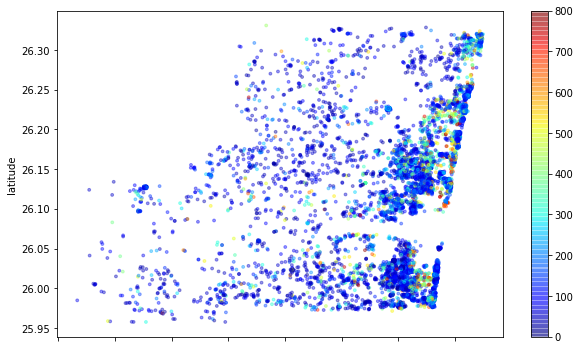

In [67]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'),figsize=(10,6));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Temos como resultado a média do mínimo de noite para aluguel de **4 noites**.

In [37]:
# ver a média da coluna `minimum_nights``
print("Média do mínimo de noites: {}".format(round(df_clean.minimum_nights.mean()),2))

Média do mínimo de noites: 4


## Conclusões


Feita apenas uma análise superficial na base de dados do Airbnb, porém já foi perceptível a presença de *outliers* em algumas variáveis.

**Alguns pontos interessantes, de acordo com os dados:** 
* Em média as pessoas alugam pelo menos 4 noites para ficar na Flórida;
* O valor médio pago é de `$ 177.00` e de acordo com a cidade de Hollywood que possui maior representatividade, o preço médio pago é de `$ 181.00`;
* Aproximadamente 76% das pessoas preferem alugar a casa/apto de forma integral, 22% preferem *private room* e apenas 2% casa/apto compartilhado ou "hotel room".

Notável que há localidades com poucos imóveis disponíveis e variáveis com dados nulos e por isto dados estatísticos podem ficar distorcidos.

Por fim, reforço que este `dataset` é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja utilizado, em uma próxima análise exploratória, o conjunto de dados completo que está no arquivo `listings.csv.gz`, com 106 atributos disponíveis.